# Challenge
In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

* Apply dimensionality reduction techniques to visualize the observations.
* Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [36]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import umap

## Load, Clean, and Select Features

In [37]:
# Load data (originally from 
# https://www.kaggle.com/brunogrisci/breast-cancer-gene-expression-cumida)
breast_df = pd.read_csv("Breast_GSE45827.csv")

In [38]:
# Preview first 5 lines of loaded data
breast_df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,206926_s_at,206927_s_at,206928_at,206929_s_at,206930_at,206931_at,206932_at,206933_s_at,206934_at,206935_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,6.167506,4.157291,8.463251,8.233774,3.440250,3.249266,4.077760,5.114589,3.649391,3.048597
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,6.016303,3.746938,9.166471,7.922956,2.832078,3.563185,4.457529,4.774928,3.886136,4.945811
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,6.298974,3.818161,8.691060,7.209782,3.371737,3.500604,4.909135,4.619495,3.393670,2.940155
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,5.924285,3.799996,8.519125,7.011523,3.412964,3.716722,4.822208,4.792745,3.619956,2.710000
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,5.984826,4.005609,9.199242,7.460834,3.155281,4.028018,5.705145,4.477804,3.724393,2.829142


In [39]:
# Look for missing values
(breast_df.isnull().sum() / breast_df.isnull().count() * 100).max()

0.0

There are no missing values.

In [40]:
# Create X and y
X = breast_df.drop(['samples', 'type'], axis=1)
y = breast_df['type']

# Standardize features and reassign to a data frame
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_df = pd.DataFrame(X_std, index=X.index, columns=X.columns)

In [41]:
# Preview first 5 lines of standardized data
X_std_df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,206926_s_at,206927_s_at,206928_at,206929_s_at,206930_at,206931_at,206932_at,206933_s_at,206934_at,206935_at
0,-0.799563,0.661843,0.310655,0.041789,-0.985780,-0.672168,-1.225551,-0.994281,0.659284,-1.299077,...,0.558714,-0.148957,1.209786,1.411273,-0.149518,-1.573500,-0.941213,1.861116,-0.422977,-0.113567
1,-0.781052,0.824165,1.302215,1.050345,-0.225934,0.362588,-0.660486,-0.421679,-0.012215,-0.651294,...,-0.126721,-0.837139,1.978431,0.919467,-1.516067,-0.622841,-0.603877,0.557078,0.504942,1.838678
2,-0.385048,1.852277,-0.760019,1.057150,-0.374541,-1.168619,-1.737551,-0.939433,0.992361,-0.729226,...,1.154686,-0.717695,1.458790,-0.208983,-0.303465,-0.812359,-0.202729,-0.039664,-1.425268,-0.225154
3,-0.951940,-0.390221,0.395305,-1.069436,-0.022818,0.768958,0.570620,-0.475208,0.751545,-1.229081,...,-0.543857,-0.748159,1.270859,-0.522686,-0.210829,-0.157875,-0.279944,0.625484,-0.538345,-0.461986
4,-1.522007,0.162605,0.729207,-0.017658,-0.096782,0.469116,0.166878,-0.941935,0.981465,-1.112820,...,-0.269413,-0.403336,2.014250,0.188256,-0.789838,0.784841,0.504342,-0.583649,-0.129008,-0.339387


In [42]:
# Currently have more variables than samples
# Perform PCA to select top 20 features for modeling
# and reassign to data frame
pca = PCA(n_components=20).fit_transform(X_std_df)
X_20 = pd.DataFrame(pca, index=X_std_df.index)

In [43]:
# Preview first 5 lines of 20 pca features
X_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-55.505861,47.567362,-9.974452,-12.133635,38.805298,-23.356871,-2.690893,-18.990831,10.155840,0.841204,12.145737,-4.101817,-5.339336,-7.120875,-4.840303,-12.431706,3.322183,-25.808997,15.569129,-1.706151
1,-65.235544,25.334765,-18.229528,-1.027000,37.475230,-20.660677,15.916691,-18.834347,0.037022,3.662532,6.128414,-12.116234,-20.037232,-10.923166,3.565170,8.501748,10.173818,14.992292,-5.076451,-11.037323
2,-38.218048,68.502152,-6.929881,-7.002232,41.584396,-23.085813,27.926116,-27.178397,7.795566,1.413066,6.564424,-7.387816,8.775404,12.704015,-8.043099,-22.323275,-5.334335,-27.840810,48.013424,45.659443
3,-59.235198,21.526959,-16.320997,-18.769206,34.660759,-14.739404,-28.874319,-16.541132,3.445956,7.577970,-4.616169,1.234695,-6.942378,-0.725601,2.548320,9.871407,-14.371420,-8.865577,-15.807860,-15.394206
4,-69.223132,22.769136,-9.805828,-10.249800,32.995366,-19.519510,-12.984881,-12.326949,14.203456,2.630906,-0.836211,-1.571068,-4.905170,-6.049990,-3.208574,4.464475,-15.431926,-11.113749,-2.960180,-5.282662


In [44]:
# Scale features and reassign to a data frame
scaler = MinMaxScaler()
X_20_sca = scaler.fit_transform(X_20)
X_20_sca_df = pd.DataFrame(X_20_sca, index=X_20.index)

In [45]:
# Check that data is scaled as expected (0 to 1)
X_20_sca_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.331082,0.340193,0.489133,0.372382,0.338047,0.449890,0.461165,0.409876,0.419824,0.483039,0.488430,0.329396,0.499502,0.443773,0.381657,0.419824,0.331619,0.392300,0.406343,0.345748
std,0.179947,0.226389,0.260153,0.200202,0.199658,0.200474,0.159242,0.208185,0.194758,0.171644,0.129947,0.131915,0.140319,0.141544,0.139750,0.149817,0.159589,0.160667,0.139659,0.160712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.178701,0.172059,0.264691,0.223782,0.201170,0.323234,0.360919,0.266827,0.292862,0.390012,0.426622,0.257908,0.417121,0.363114,0.288024,0.330507,0.230346,0.298984,0.323530,0.242271
50%,0.331180,0.299448,0.532991,0.354072,0.295470,0.447096,0.460752,0.368826,0.414957,0.481688,0.489372,0.338182,0.507283,0.441911,0.395111,0.424983,0.313748,0.388608,0.419583,0.344994
75%,0.440541,0.447507,0.702540,0.466585,0.437721,0.575506,0.557128,0.520950,0.527797,0.583062,0.565968,0.395632,0.578358,0.518409,0.466091,0.491073,0.404414,0.478896,0.489617,0.446735
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Convert classes in y to integers
for i in range(len(y)):
    if y[i] == 'normal':
        y[i] = 0
    elif y[i] == 'HER':
        y[i] = 1
    elif y[i] == 'cell_line':
        y[i] = 2
    elif y[i] == 'basal':
        y[i] = 3
    elif y[i] == 'luminal_A':
        y[i] = 4
    elif y[i] == 'luminal_B':
        y[i] = 5

# Check y
y

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ip

0      3
1      3
2      3
3      3
4      3
      ..
146    5
147    5
148    5
149    5
150    5
Name: type, Length: 151, dtype: object

## K-means

In [51]:
# Define k-means cluster
km_cluster = KMeans(n_clusters=6, random_state=123)

# Fit model
y_pred = km_cluster.fit_predict(X_20_sca_df)

In [52]:
# Calculate adjusted rand index (ARI)
ari = metrics.adjusted_rand_score(y, y_pred)

# Calculate silhouette coefficient
sc = metrics.silhouette_score(X_20_sca_df, y_pred, metric='euclidean')

print('ARI: {}\nSilhouette Score: {}'.format(round(ari, 2), round(sc, 2)))

ARI: 0.52
Silhouette Score: 0.13


The ARI score is quite a bit better than random, but still not great. The silhouette score is near 0, suggesting overlapping clusters.

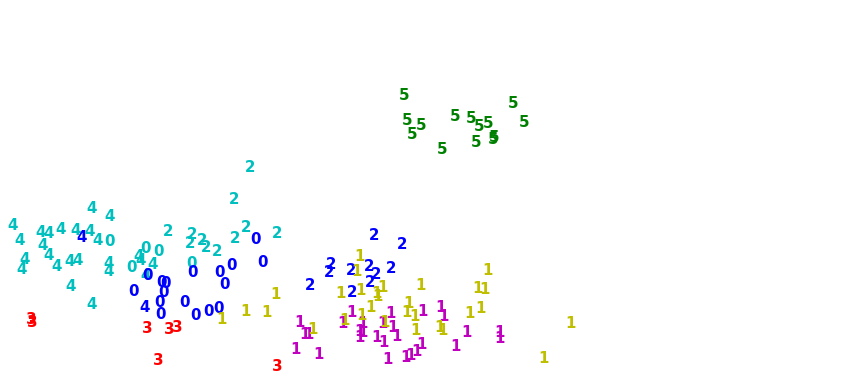

In [53]:
# Use first two components to visualize clusters
pca = PCA(n_components=2).fit_transform(X_20_sca_df)

plt.figure(figsize=(10, 5))
colors = 'rbgcmy' # Colors denote true classes
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 15}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

K-means was able to correctly capture two classes in full (3 and 5), but failed to fully separate the other four classes (0, 1, 2, and 4). PCA is not able to capture the local similarities very well, as many of the clusters appear to be overlapping.

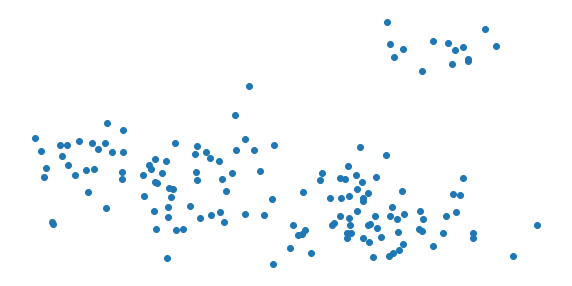

In [54]:
plt.figure(figsize=(10, 5))
plt.scatter(pca[:, 0], pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Besides the top right cluster, the other clusters appear poorly separated via PCA in the absence of labels.

[t-SNE] Computing 150 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.000s...
[t-SNE] Computed neighbors for 151 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 0.614675
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.210480
[t-SNE] KL divergence after 300 iterations: 0.158550


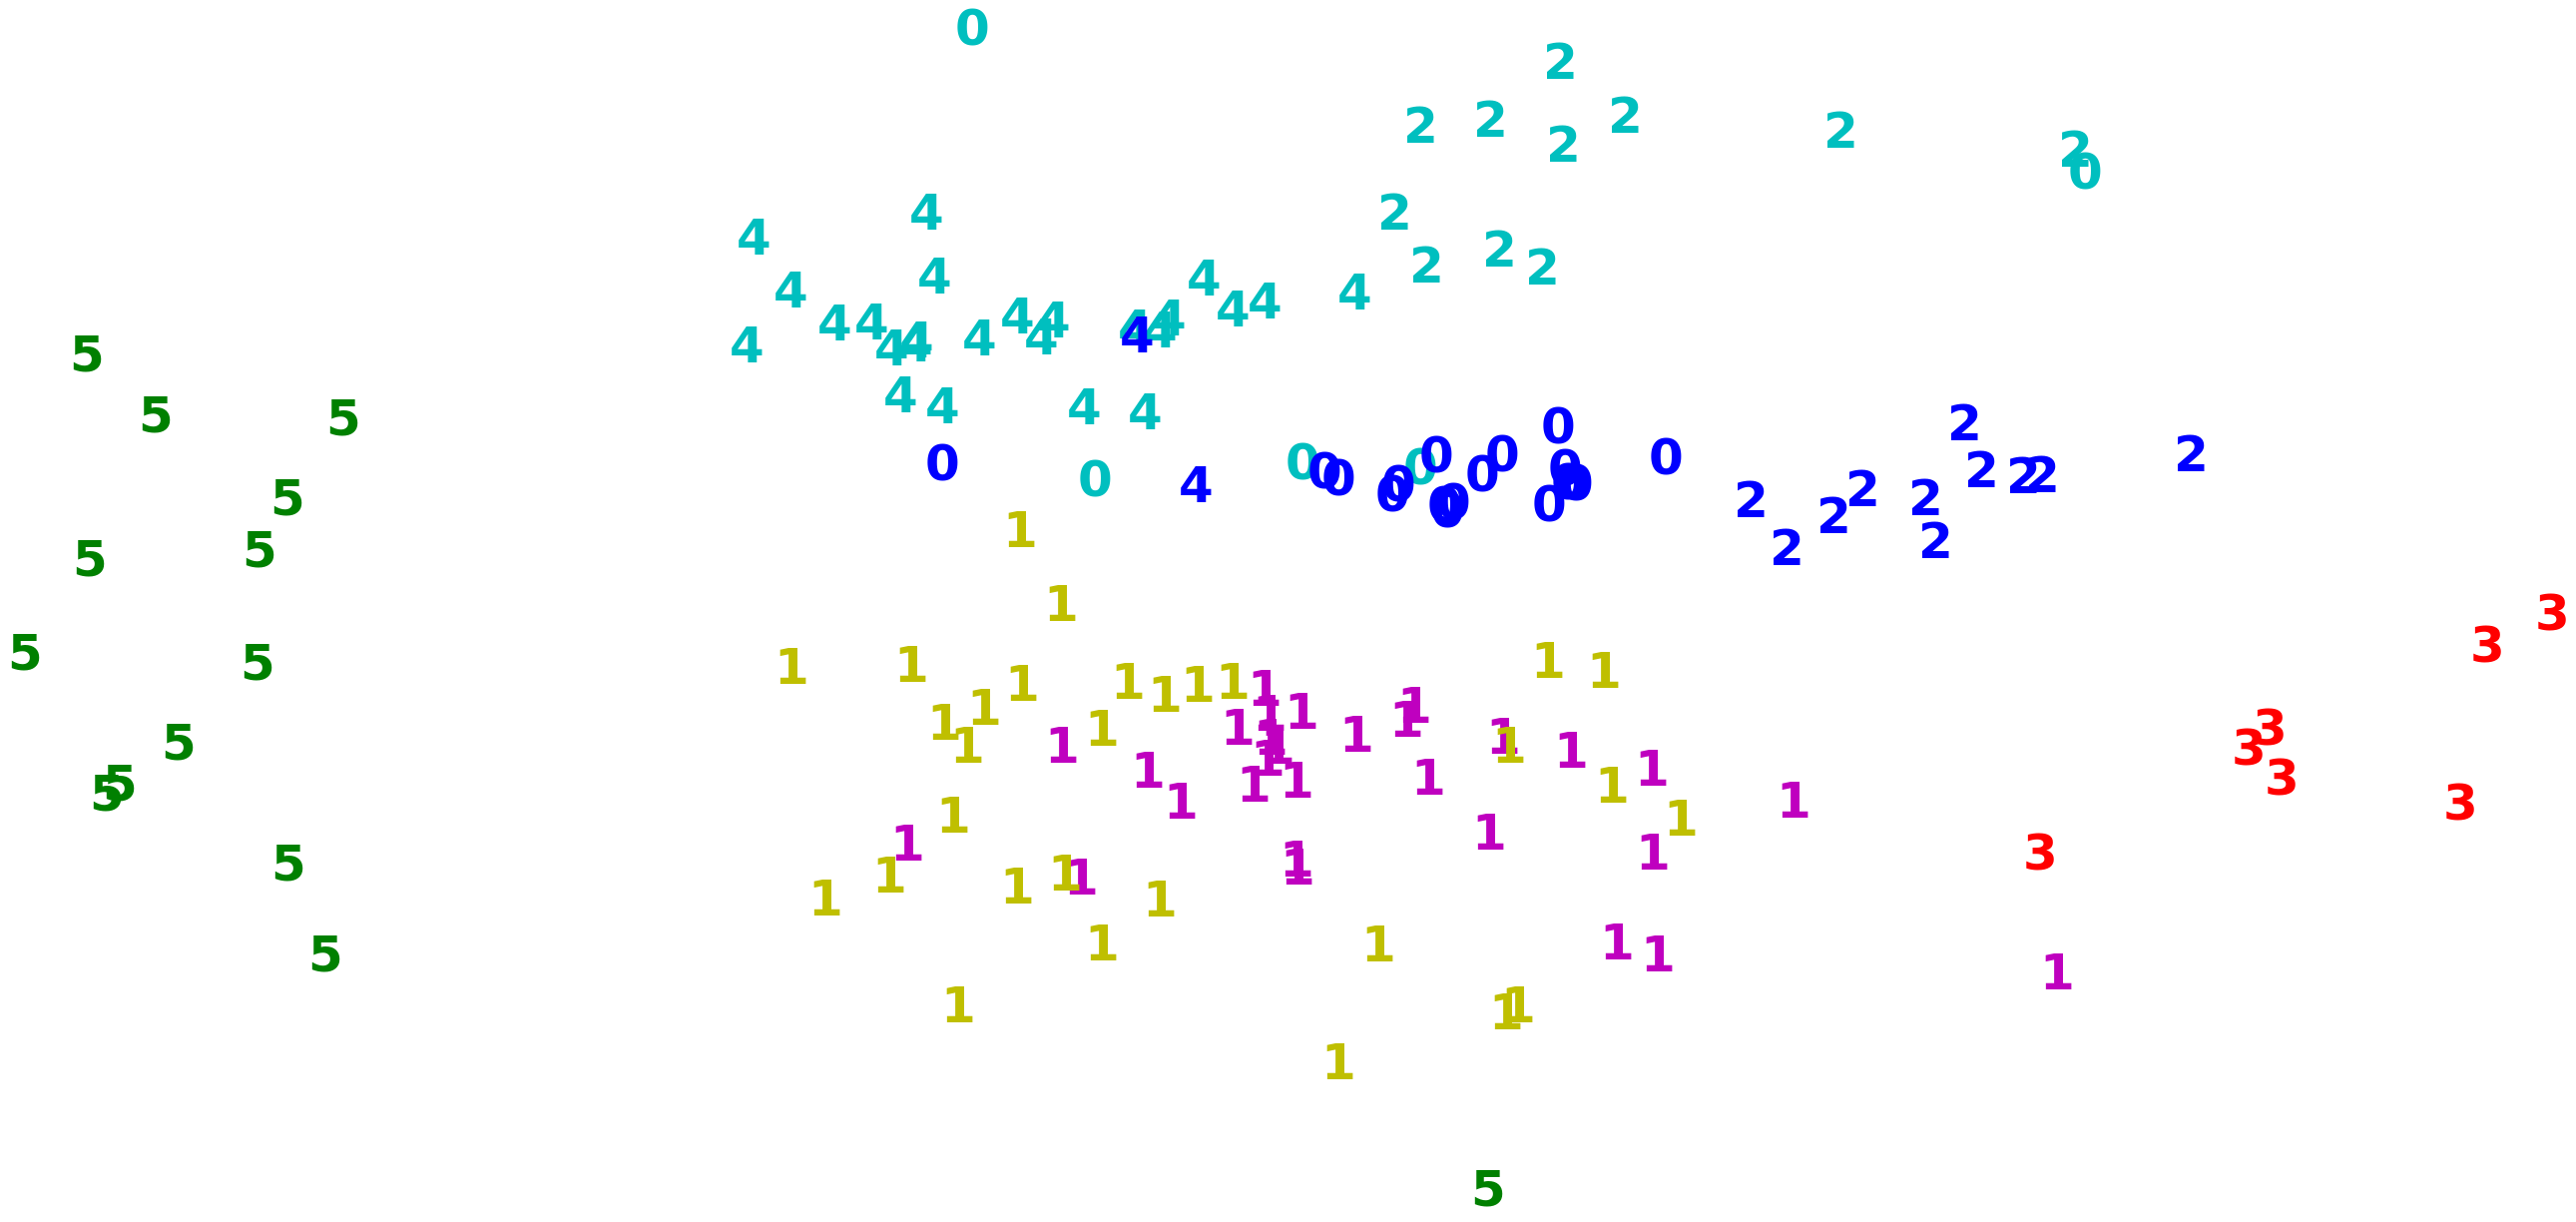

In [82]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100,
            n_iter=300).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(tsne.shape[0]):
    plt.text(tsne[i, 0], tsne[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE does a littler better job at capturing the local similarities, especially among clusters green and red.
However, it still fails to capture the local similarities of the other clusters, many of which appear to be overlapping. I tried perplexity values ranging from 5 to 150 and 100 was the best.

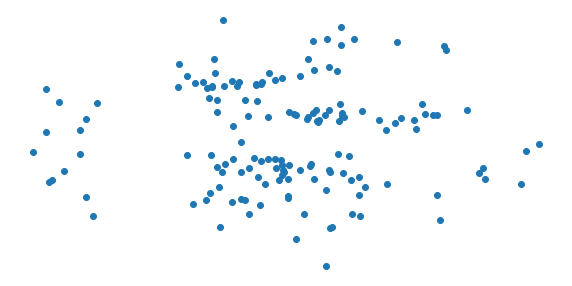

In [83]:
plt.figure(figsize=(10, 5))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Besides the cluster on the left, the other clusters appear poorly separated via PCA in the absence of labels.

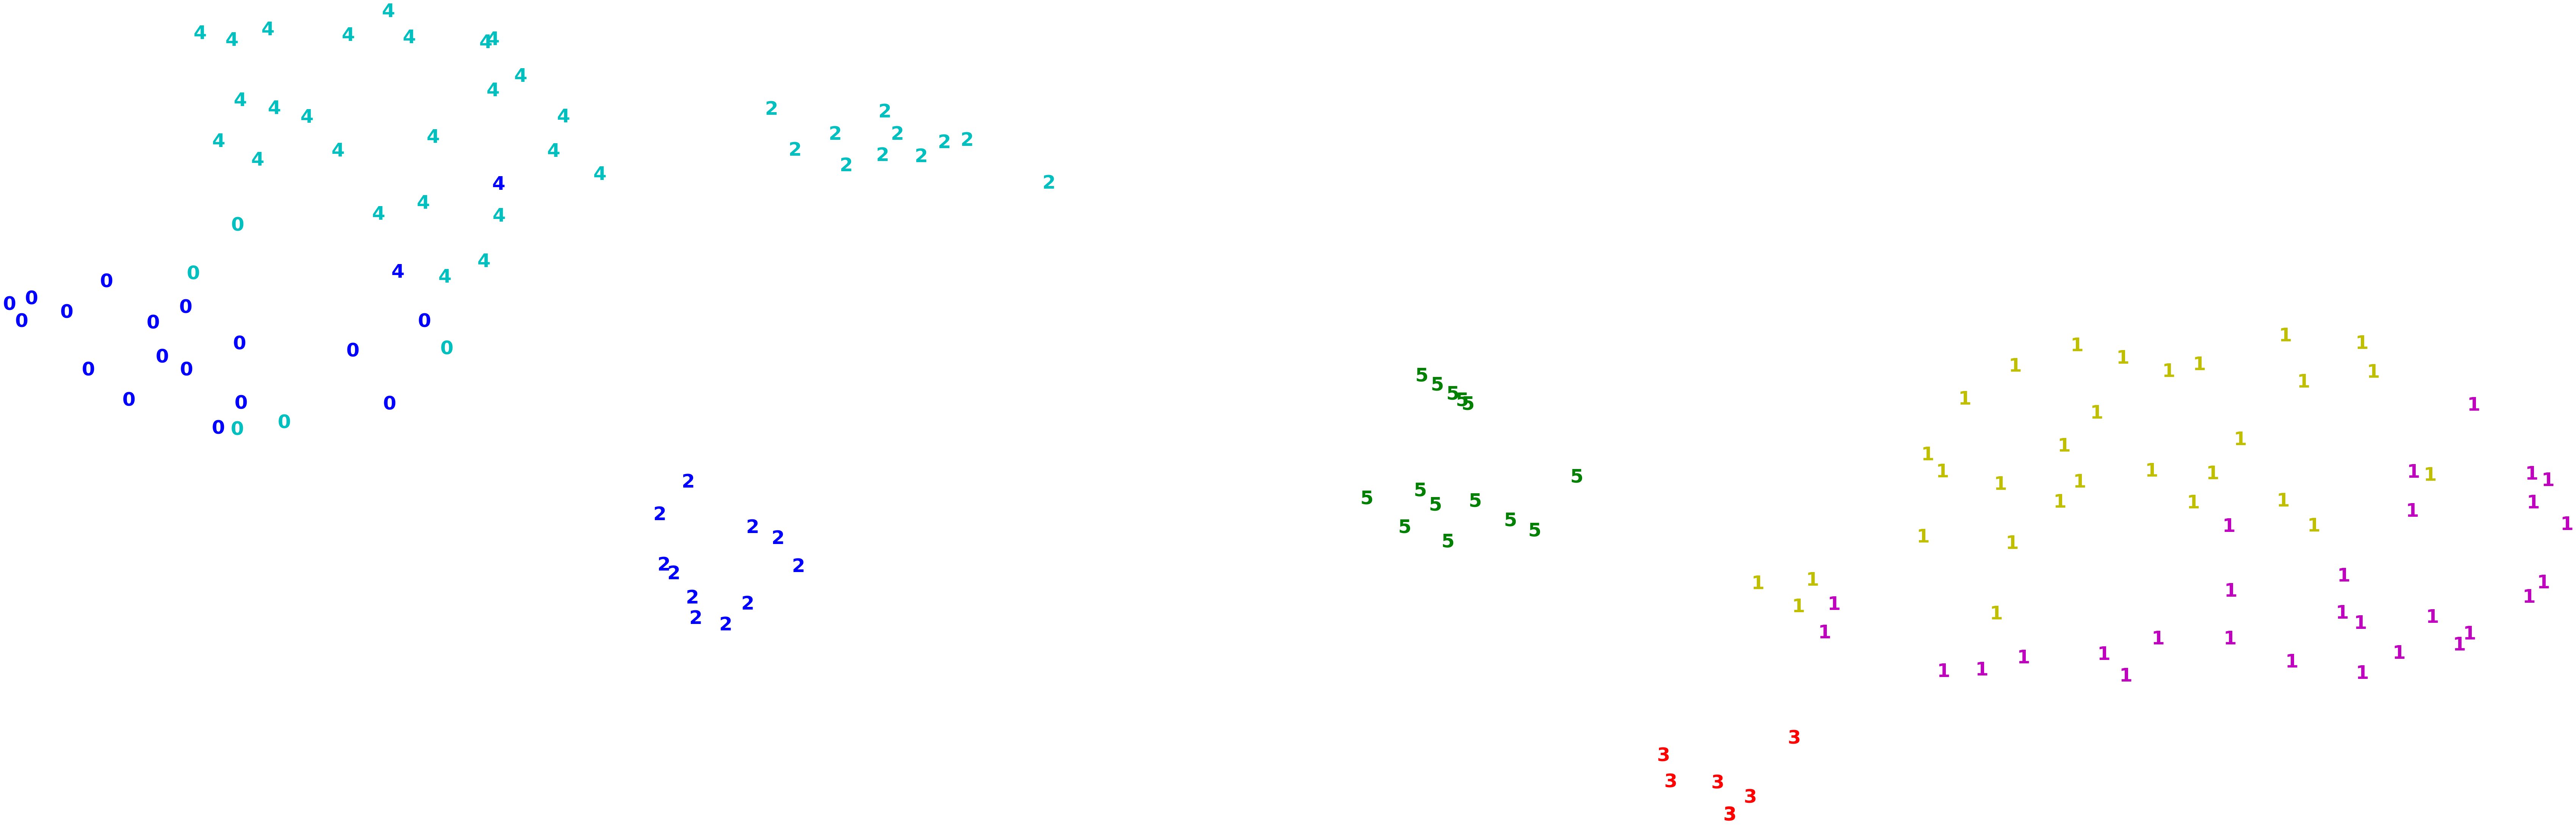

In [94]:
umap_results = umap.UMAP(n_neighbors=8,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP appears to do the best job in capturing local similarities. All of the clusters are separated from each other (although still some overlap). Unfortunately, the blue and cyan clusters are also separated into 2 distinct clusters. I tried several different combinations of n_neighbors and min_dist and 8 and 0.3 were the best.

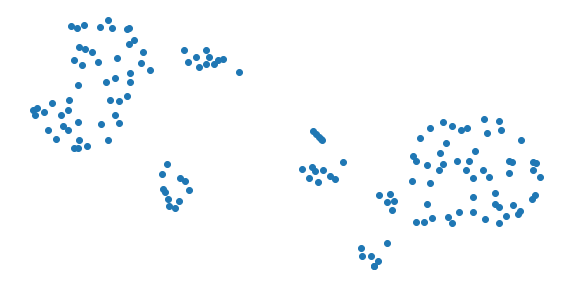

In [95]:
plt.figure(figsize=(10, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

With UMAP, I can clearly see 6 clusters even in the absence of labels.

## Hierarchical

In [140]:
# Defining the agglomerative clustering
ag_cluster = AgglomerativeClustering(linkage='ward',
                                     affinity='euclidean',
                                     n_clusters=6)

# Fit model
y_pred = ag_cluster.fit_predict(X_20_sca_df)

In [141]:
# Calculate adjusted rand index (ARI)
ari = metrics.adjusted_rand_score(y, y_pred)

# Calculate silhouette coefficient
sc = metrics.silhouette_score(X_20_sca_df, y_pred, metric='euclidean')

print('ARI: {}\nSilhouette Score: {}'.format(round(ari, 2), round(sc, 2)))

ARI: 0.47
Silhouette Score: 0.15


The ARI score is better than random, but still not great. It is also slightly lower than the ARI score for k-means. The silhouette score is near 0, again suggesting overlapping clusters. I tried several different parameters for linkage and affinity, but ward and euclidean appeared to be the best.

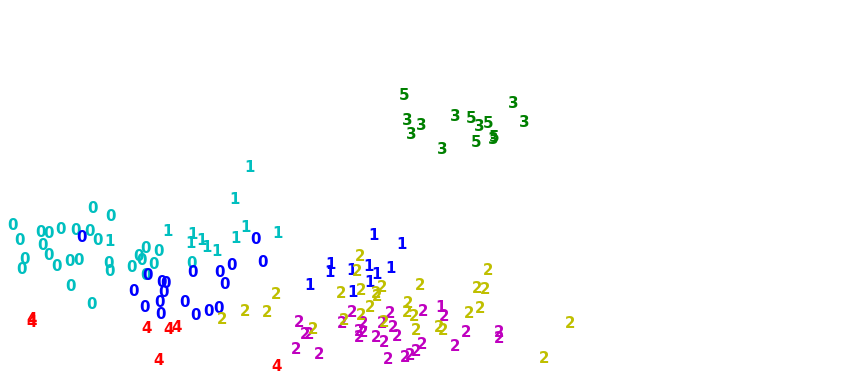

In [143]:
pca = PCA(n_components=2).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 15}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Agglomerative clustering (hierarchical) was only able to correctly capture class 4. PCA largely fails to capture local similarities, as all of the clusters appear to be overlapping.

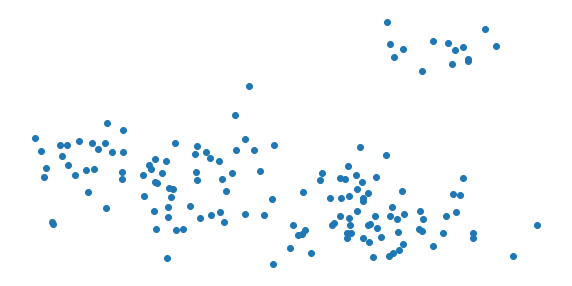

In [135]:
plt.figure(figsize=(10, 5))
plt.scatter(pca[:, 0], pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In the absence of labels, only one cluster is spatially separated from the majority cluster.

[t-SNE] Computing 150 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.000s...
[t-SNE] Computed neighbors for 151 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 0.532281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.899342
[t-SNE] KL divergence after 300 iterations: 0.268695


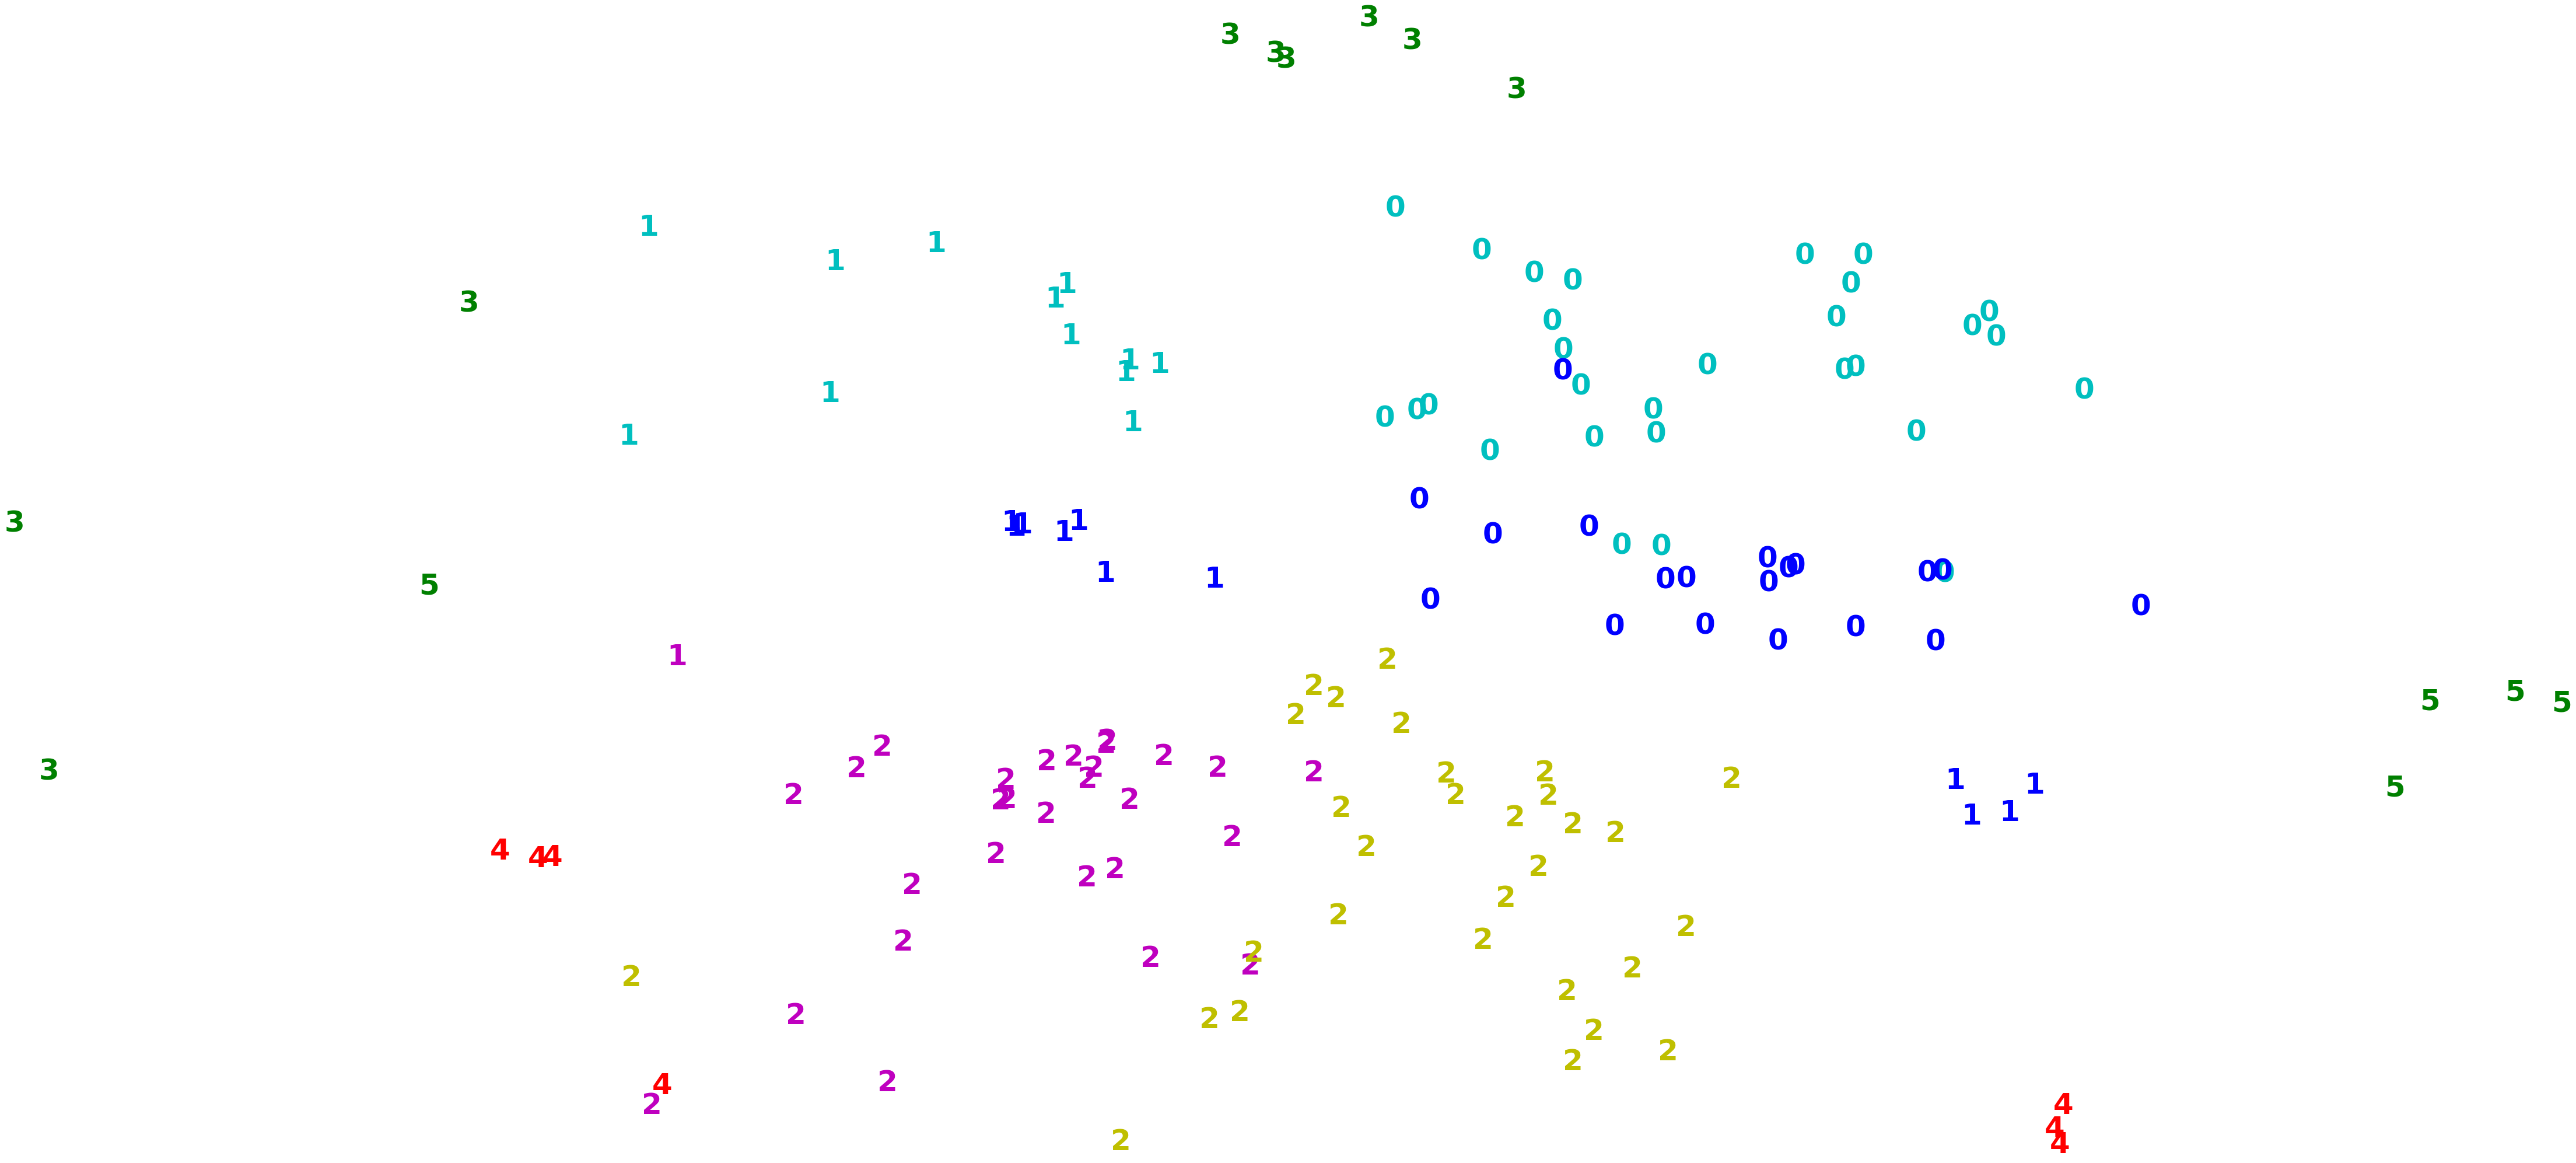

In [162]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80,
            n_iter=300).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(tsne.shape[0]):
    plt.text(tsne[i, 0], tsne[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE was largely unable to capture local similarities (no distinct clusters visible). Again, I tried perplexity values ranging from 5 to 100.

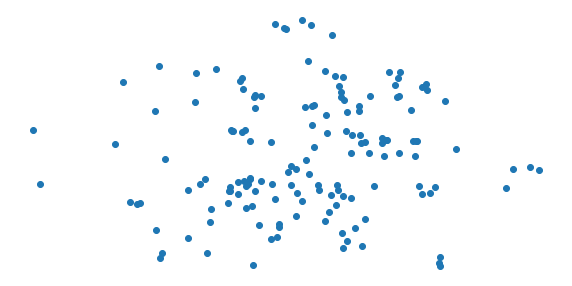

In [163]:
plt.figure(figsize=(10, 5))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE was largely unable to capture local similarities (no distinct clusters visible).

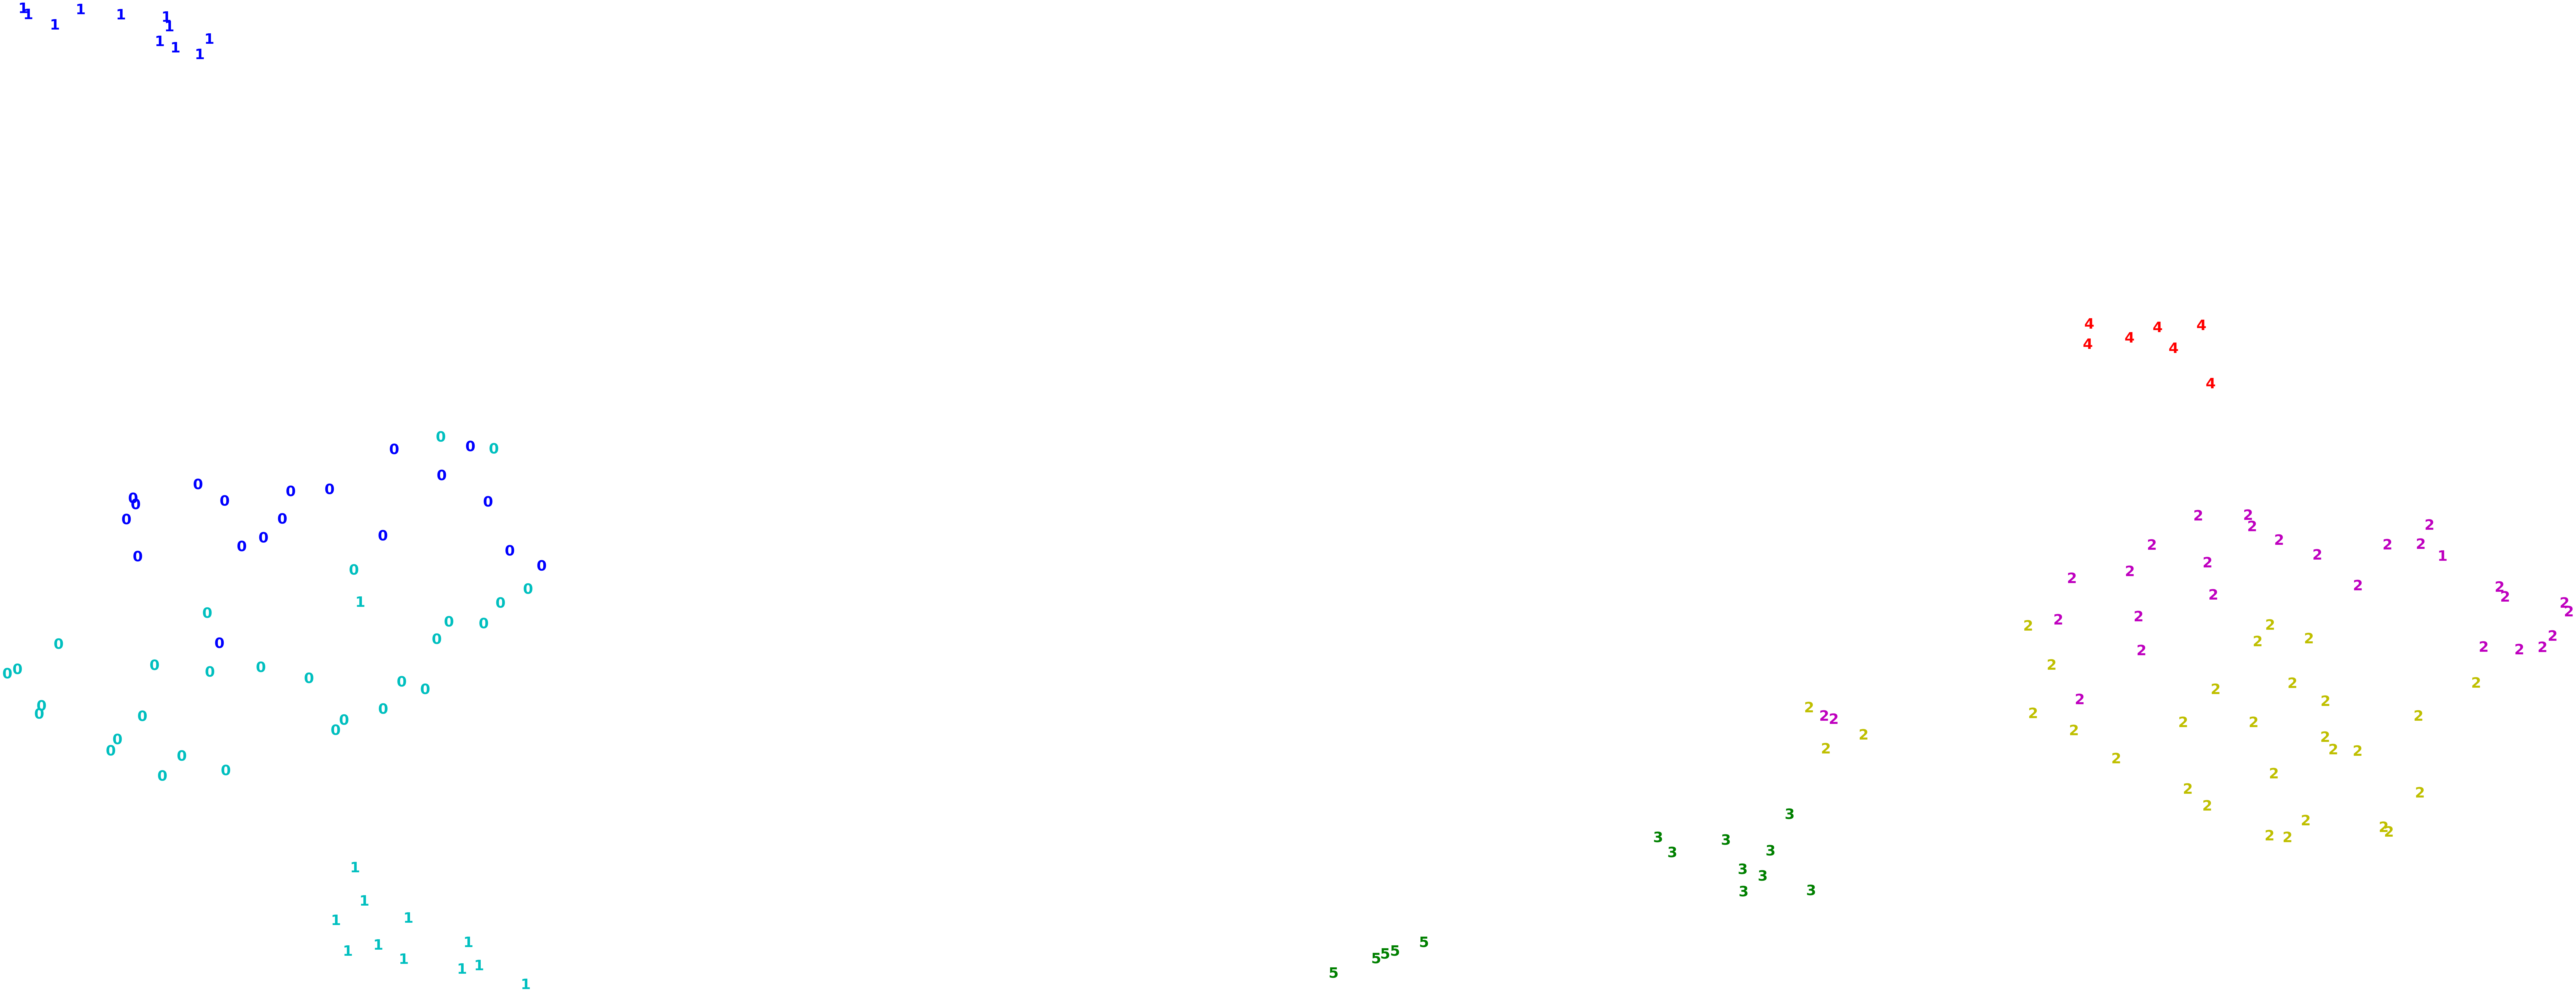

In [180]:
umap_results = umap.UMAP(n_neighbors=5,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP appears to do the best job in capturing local similarities. All of the clusters are fully or partially separated from each other (still some overlap between blue/cyan and yellow/magenta). I tried several different combinations of n_neighbors and min_dist and 5 and 0.3 were the best.

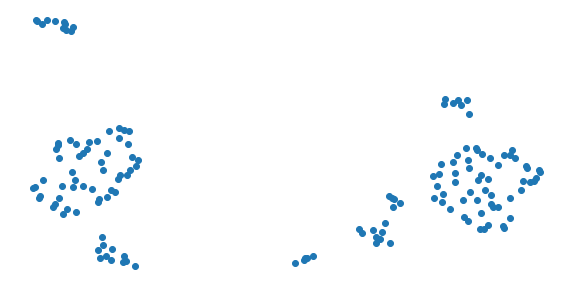

In [181]:
plt.figure(figsize=(10, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

With UMAP, I can clearly see 7 clusters without labels.

## DBSCAN

In [270]:
# Defining the dbscan clustering
db_cluster = DBSCAN(eps=0.7, min_samples=2, algorithm='auto')

# Fit model
y_pred = db_cluster.fit_predict(X_20_sca_df)

In [271]:
# Calculate adjusted rand index (ARI)
ari = metrics.adjusted_rand_score(y, y_pred)

# Calculate silhouette coefficient
sc = metrics.silhouette_score(X_20_sca_df, y_pred, metric='euclidean')

print('ARI: {}\nSilhouette Score: {}'.format(round(ari, 2), round(sc, 2)))

ARI: 0.12
Silhouette Score: 0.17


This is the poorest clustering model yet. The ARI score is just barely better than random and the silhouette score is near 0. I tried lots of combinations of eps and min-samples, but there were only a few that resulted in more than 1 or 2 clusters (either 1 cluster or individual points as clusters, not much in between).

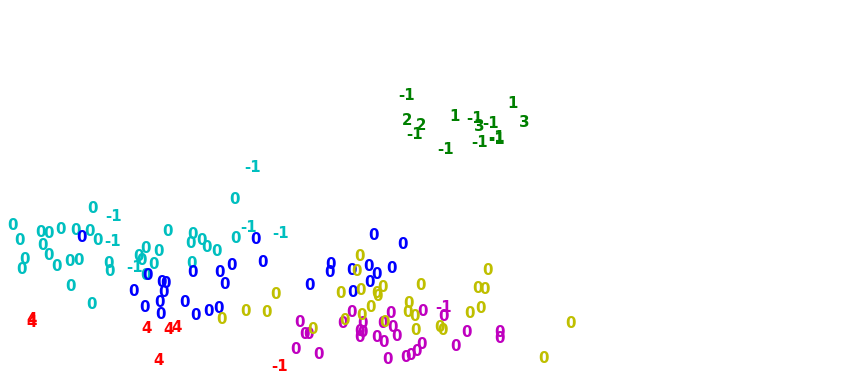

In [272]:
pca = PCA(n_components=2).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 15}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

DBSCAN assigned many points to noise. It appeared to do the best in clustering the green class, but was largely unable to separate the other classes. PCA only separated out one cluster visually.

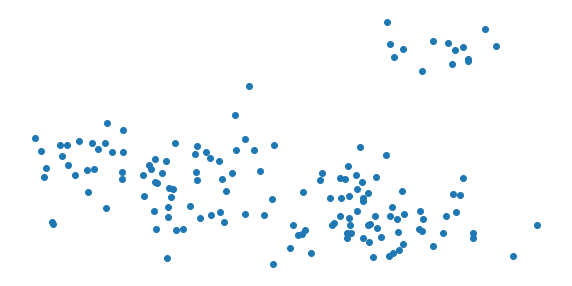

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(pca[:, 0], pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I can see two distinct clusters in the absence of labels.

[t-SNE] Computing 150 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.000s...
[t-SNE] Computed neighbors for 151 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 0.532281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.826092
[t-SNE] KL divergence after 300 iterations: 0.260903


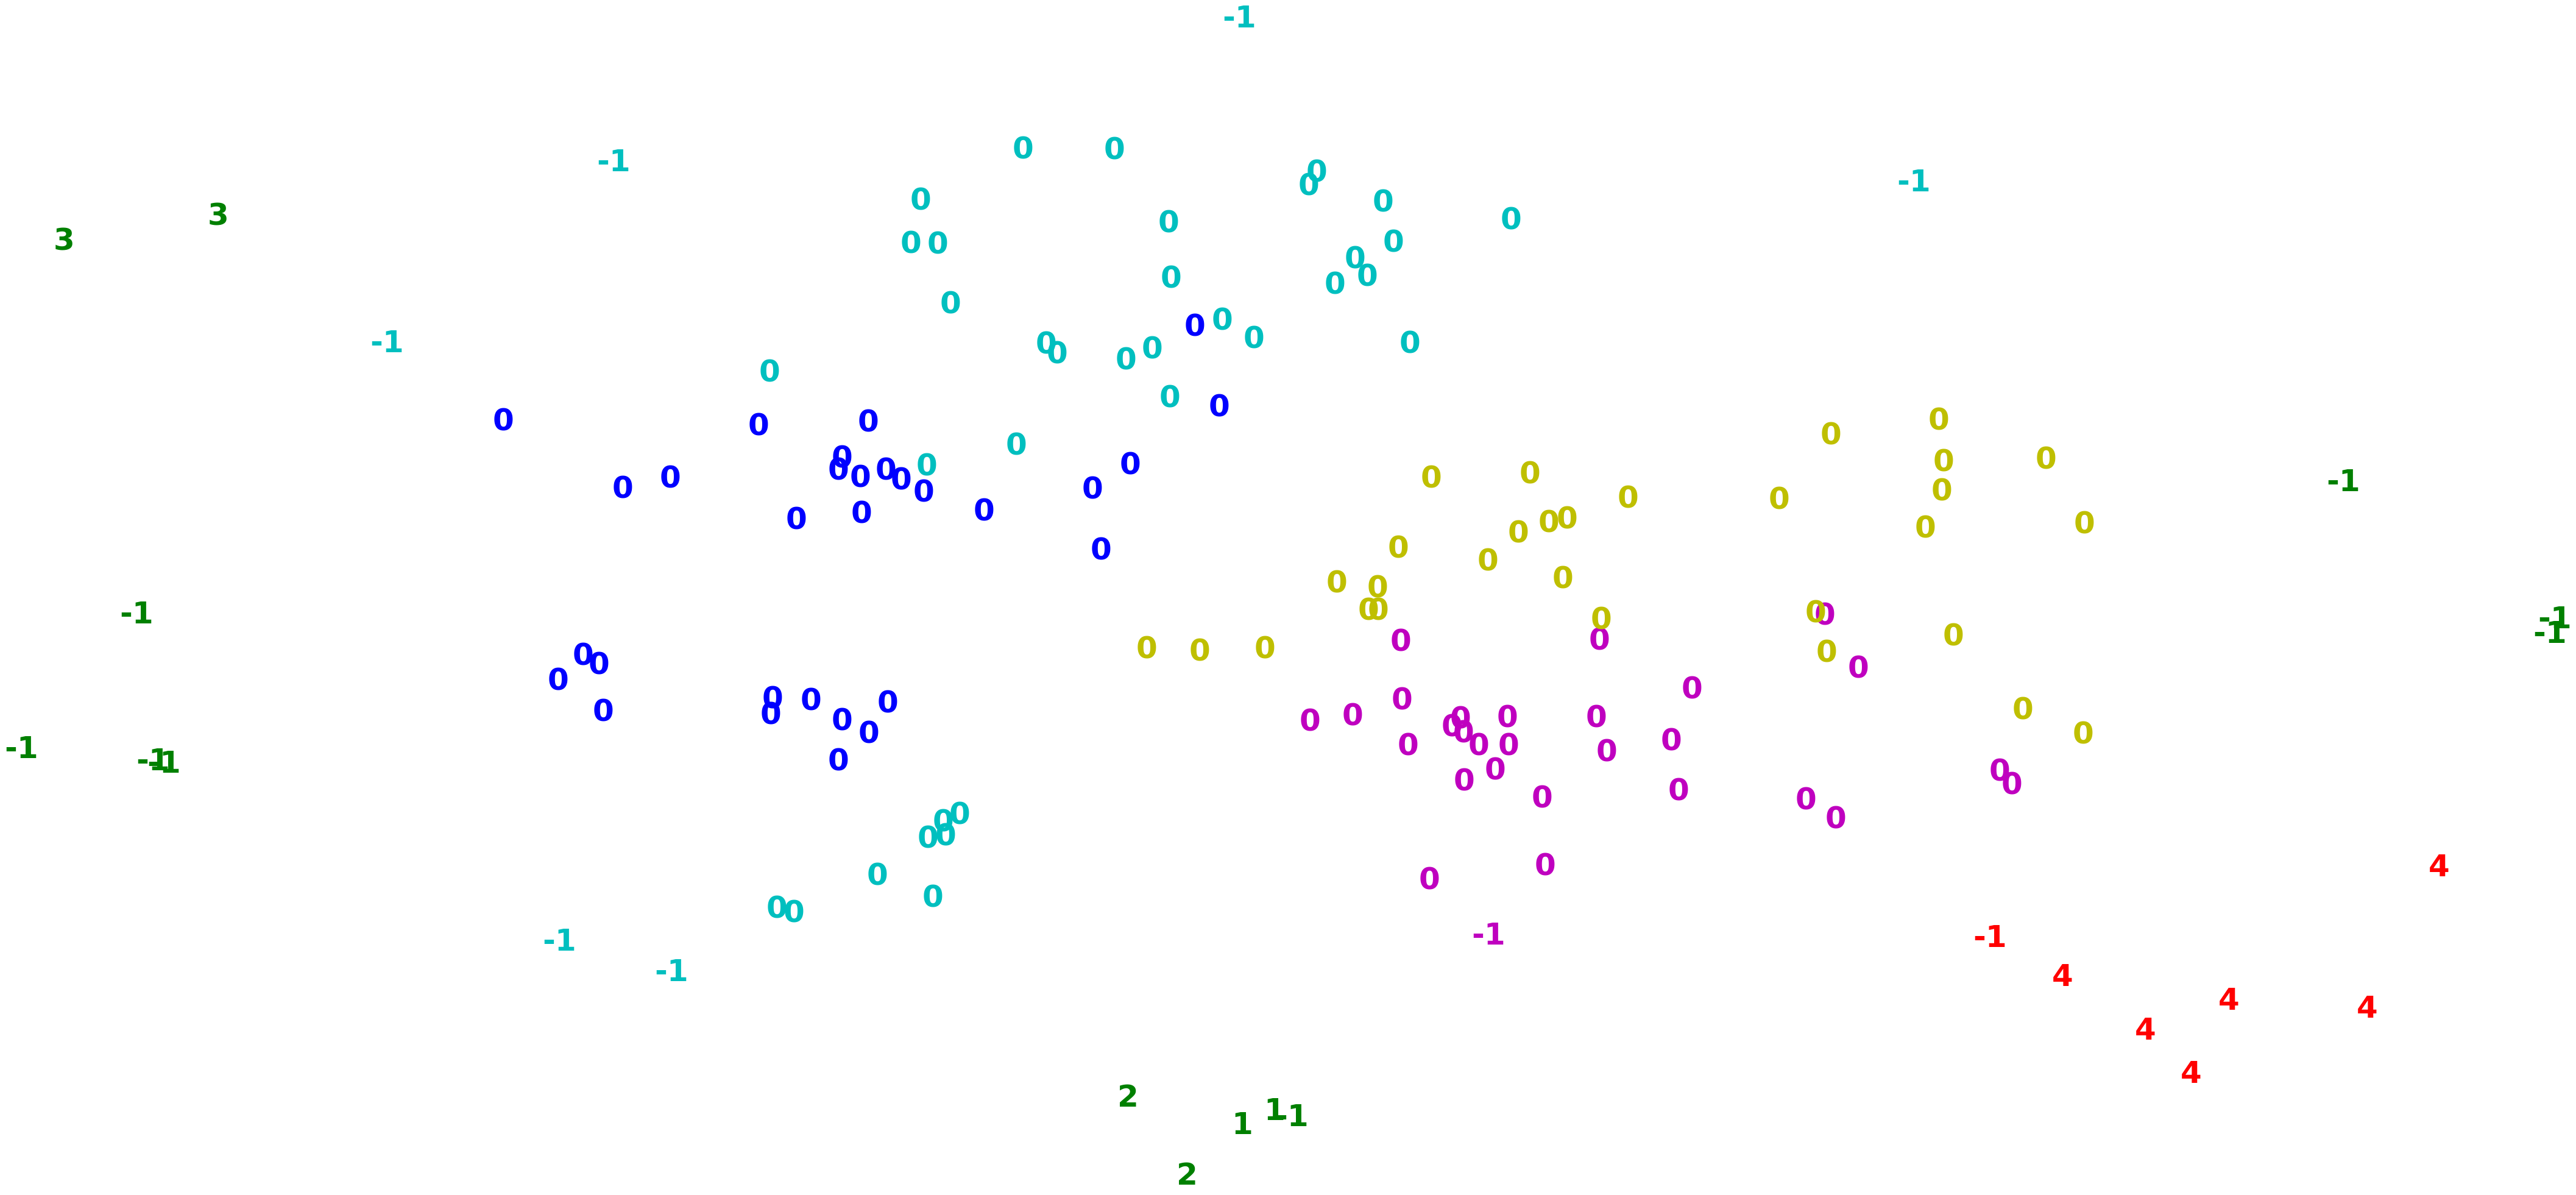

In [282]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80,
            n_iter=300).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(tsne.shape[0]):
    plt.text(tsne[i, 0], tsne[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE was largely unable to capture local similarities (no distinct clusters visible). Again, I tried perplexity values ranging from 5 to 100.

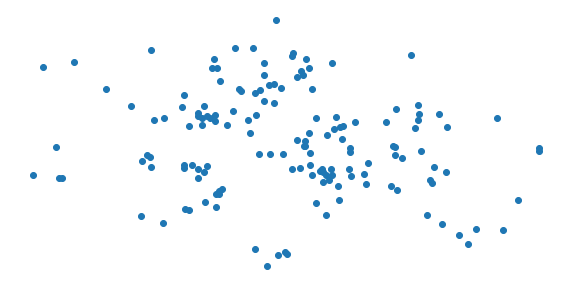

In [283]:
plt.figure(figsize=(10, 5))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE was largely unable to capture local similarities (no distinct clusters visible).

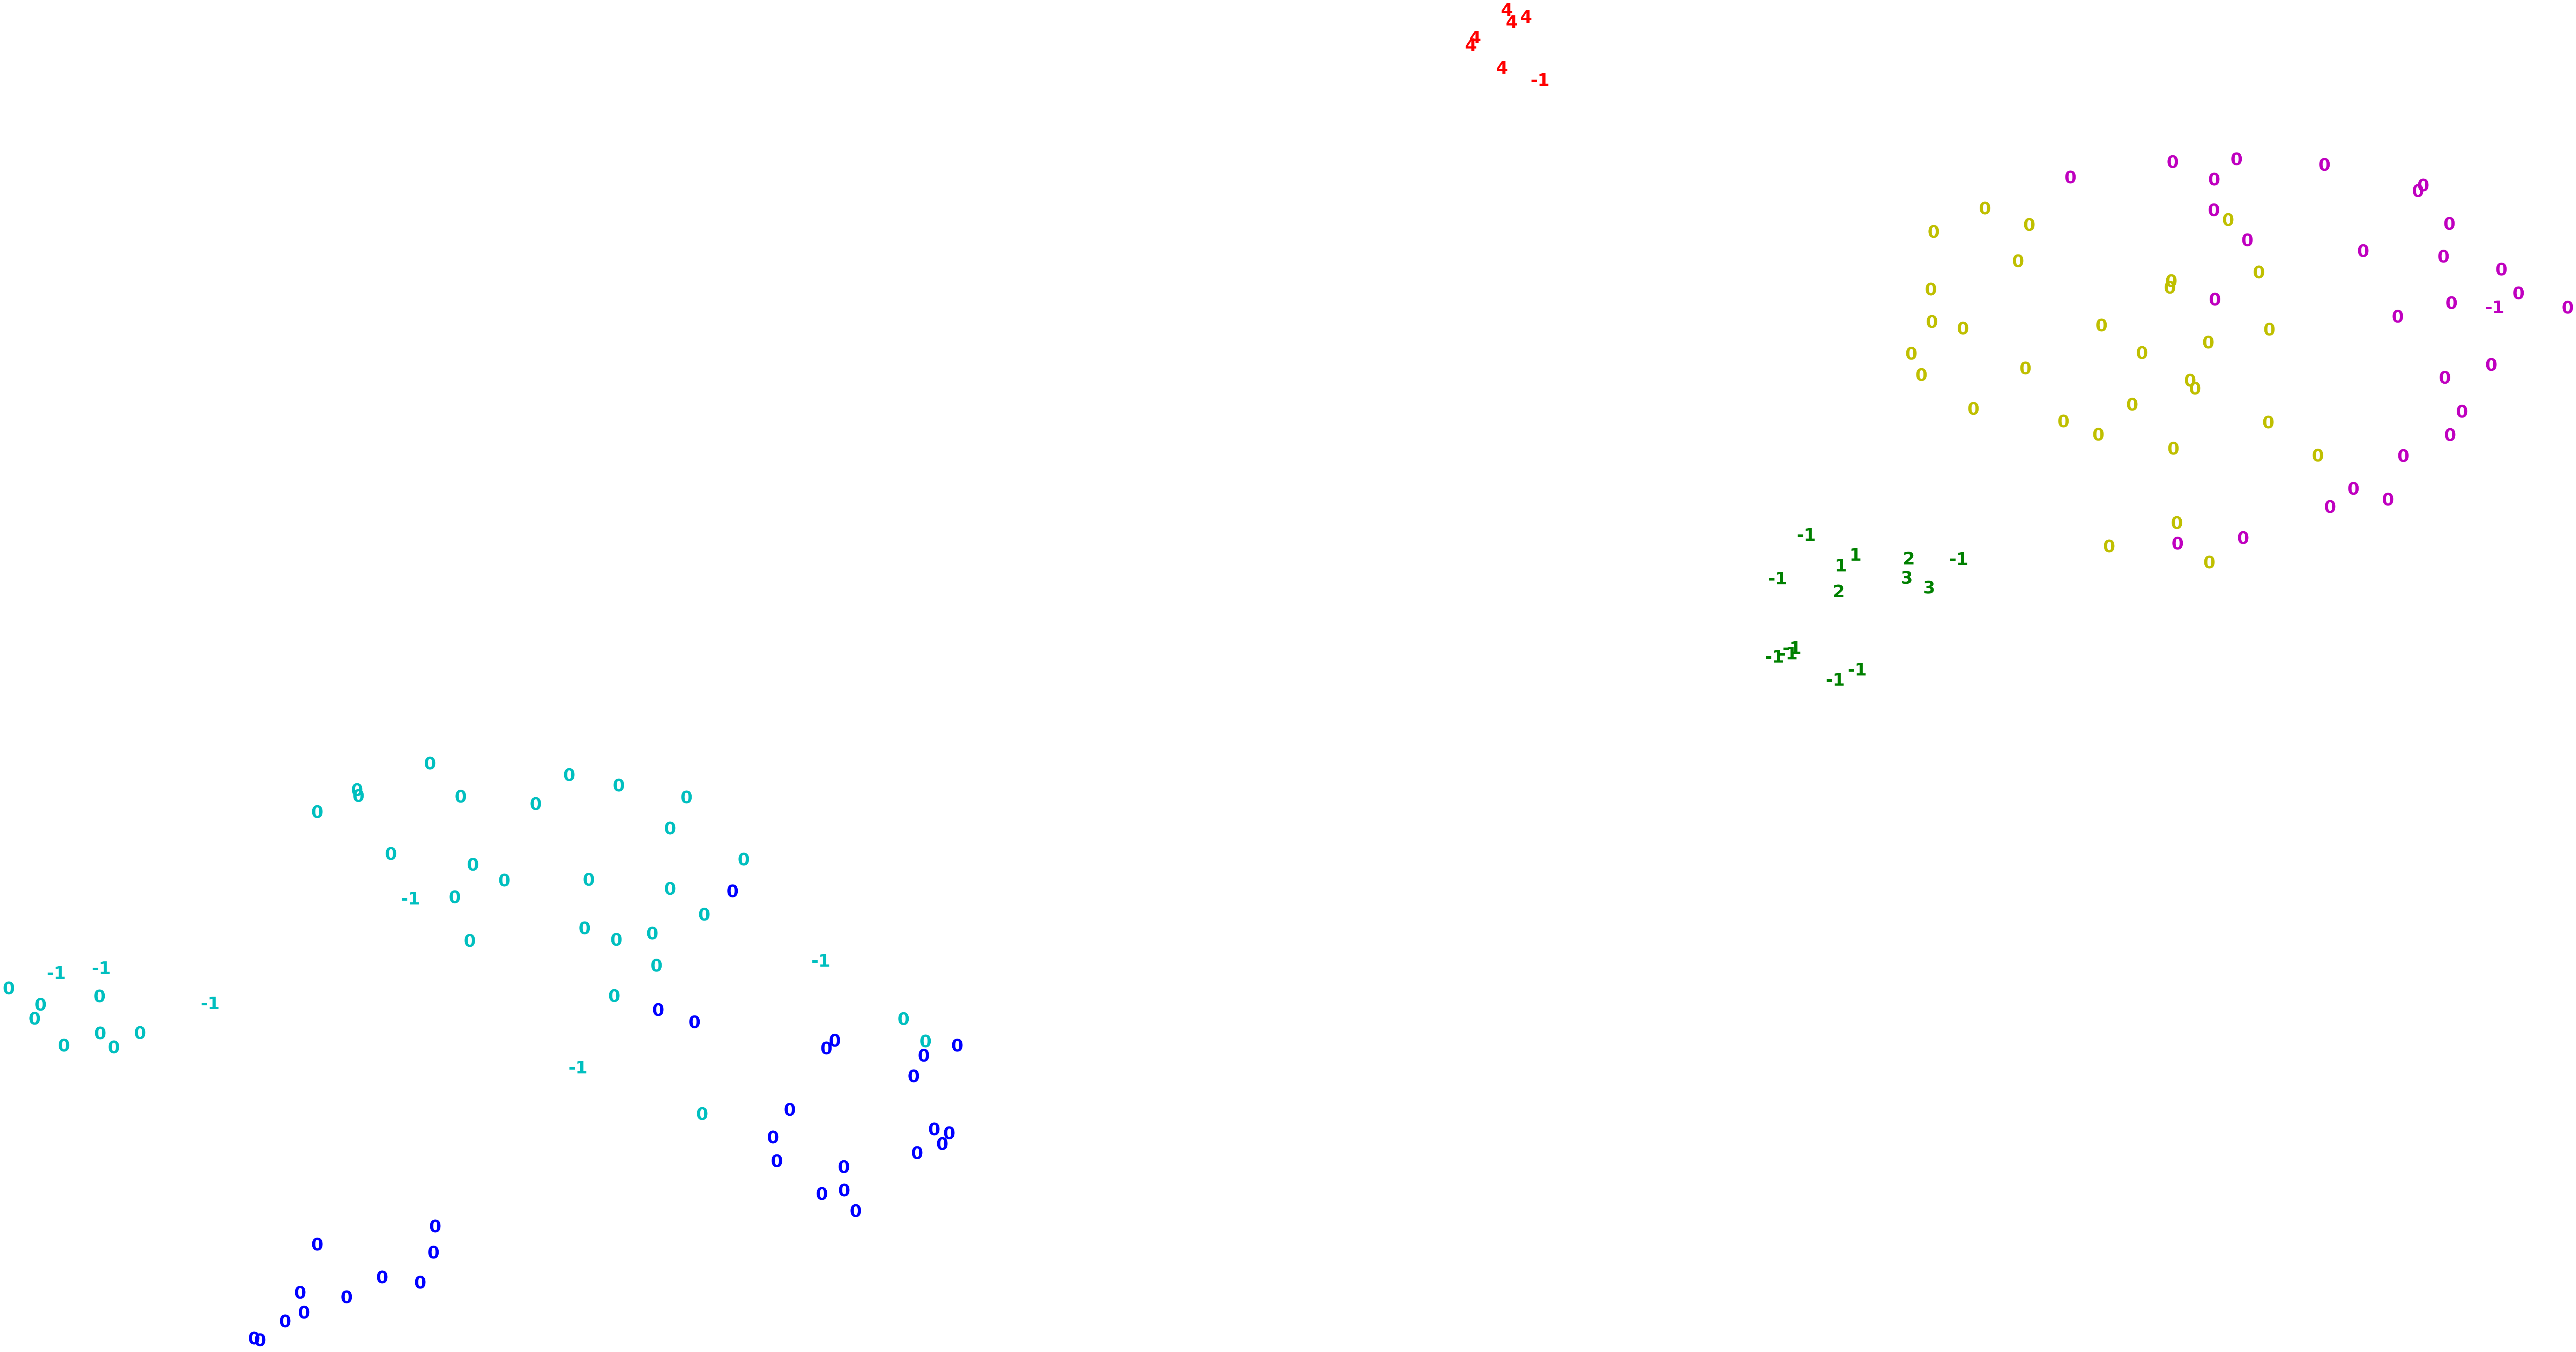

In [304]:
umap_results = umap.UMAP(n_neighbors=7,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP appears to do the best job in capturing local and distant similarities. All of the clusters are mostly separated from each other with the exception of cyan/blue and yellow/magenta. Unfortunately, a few of the clusters are split into more than one.

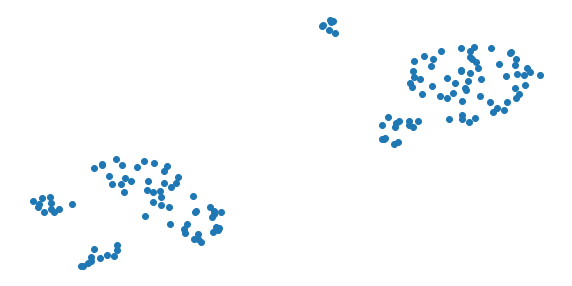

In [305]:
plt.figure(figsize=(10, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

With UMAP, I can clearly see 7 clusters without labels.

## Gaussian Mixture

In [306]:
# Defining the gmm clustering
gm_cluster = GaussianMixture(n_components=6, random_state=123)

# Fit model
y_pred = gm_cluster.fit_predict(X_20_sca_df)

In [307]:
# Calculate adjusted rand index (ARI)
ari = metrics.adjusted_rand_score(y, y_pred)

# Calculate silhouette coefficient
sc = metrics.silhouette_score(X_20_sca_df, y_pred, metric='euclidean')

print('ARI: {}\nSilhouette Score: {}'.format(round(ari, 2), round(sc, 2)))

ARI: 0.33
Silhouette Score: 0.09


The ARI score is better than random, but not great. It is lower than the ARI scores for k-means and hierarchical. The silhouette score is near 0, again suggesting overlapping clusters.

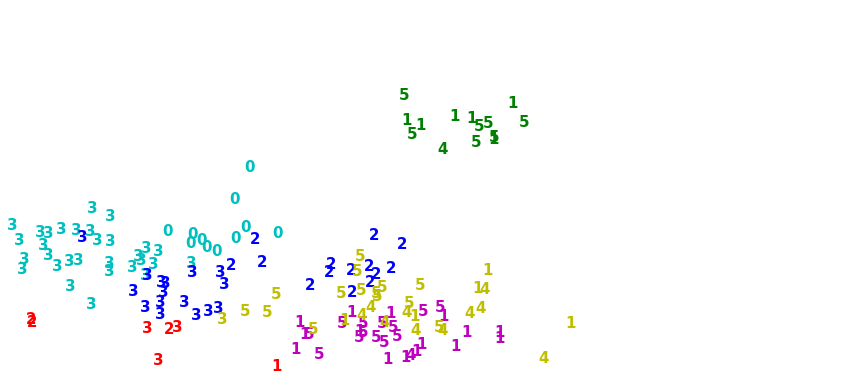

In [308]:
pca = PCA(n_components=2).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 15}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

GMM fails to correctly assign any of the six clusters. As discussed previously, PCA only separates out one cluster (green) with significant overlap between the other clusters.

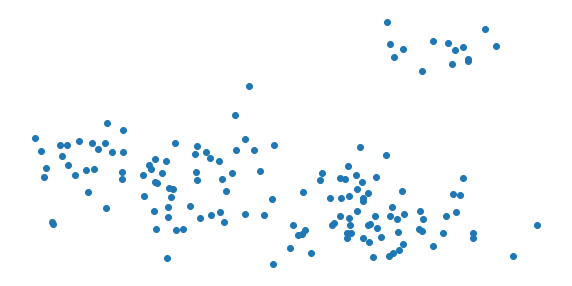

In [310]:
plt.figure(figsize=(10, 5))
plt.scatter(pca[:, 0], pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I can only see two distinct clusters in the absence of labels.

[t-SNE] Computing 150 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.000s...
[t-SNE] Computed neighbors for 151 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 0.532281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.016823
[t-SNE] KL divergence after 300 iterations: 0.256616


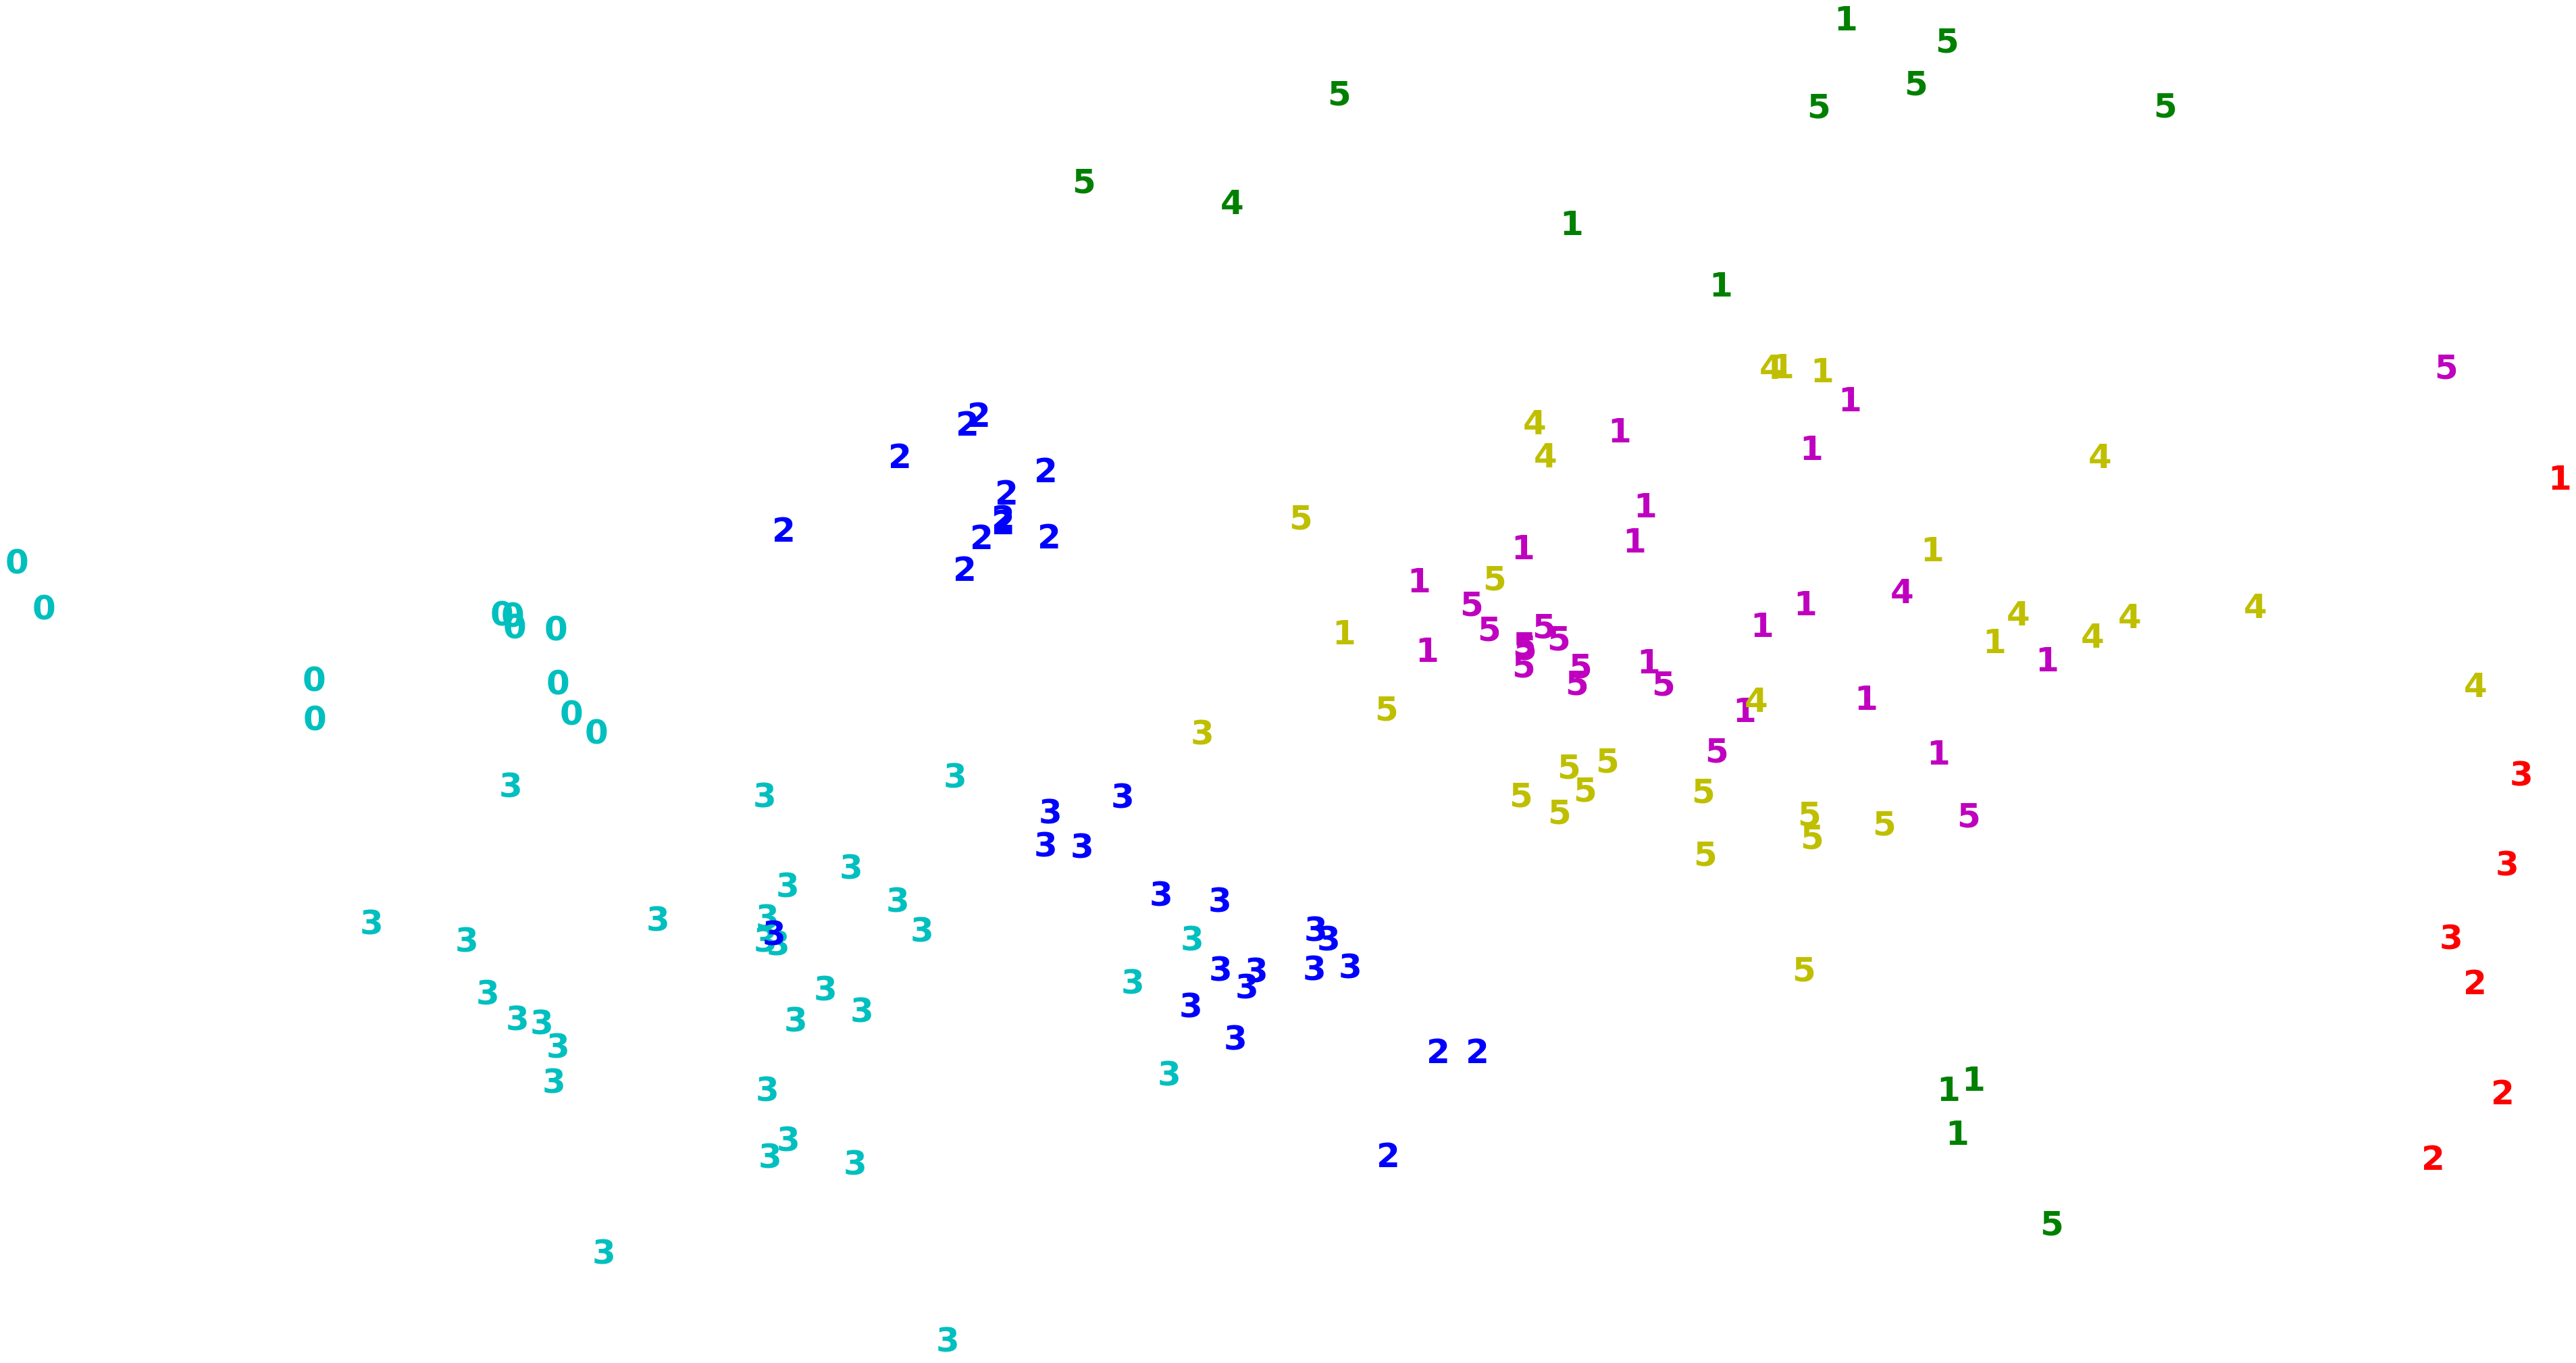

In [322]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80,
            n_iter=300).fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(tsne.shape[0]):
    plt.text(tsne[i, 0], tsne[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As discussed previously, t-SNE fails to display distinct clusters.

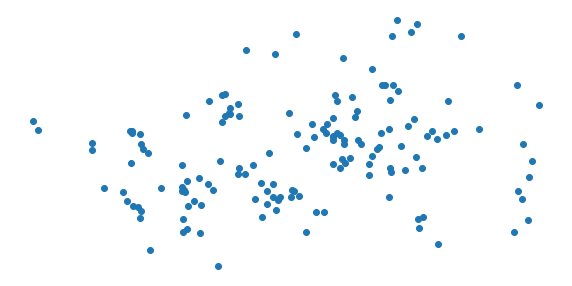

In [323]:
plt.figure(figsize=(10, 5))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I cannot really see any distinct clusters in the absence of labels.

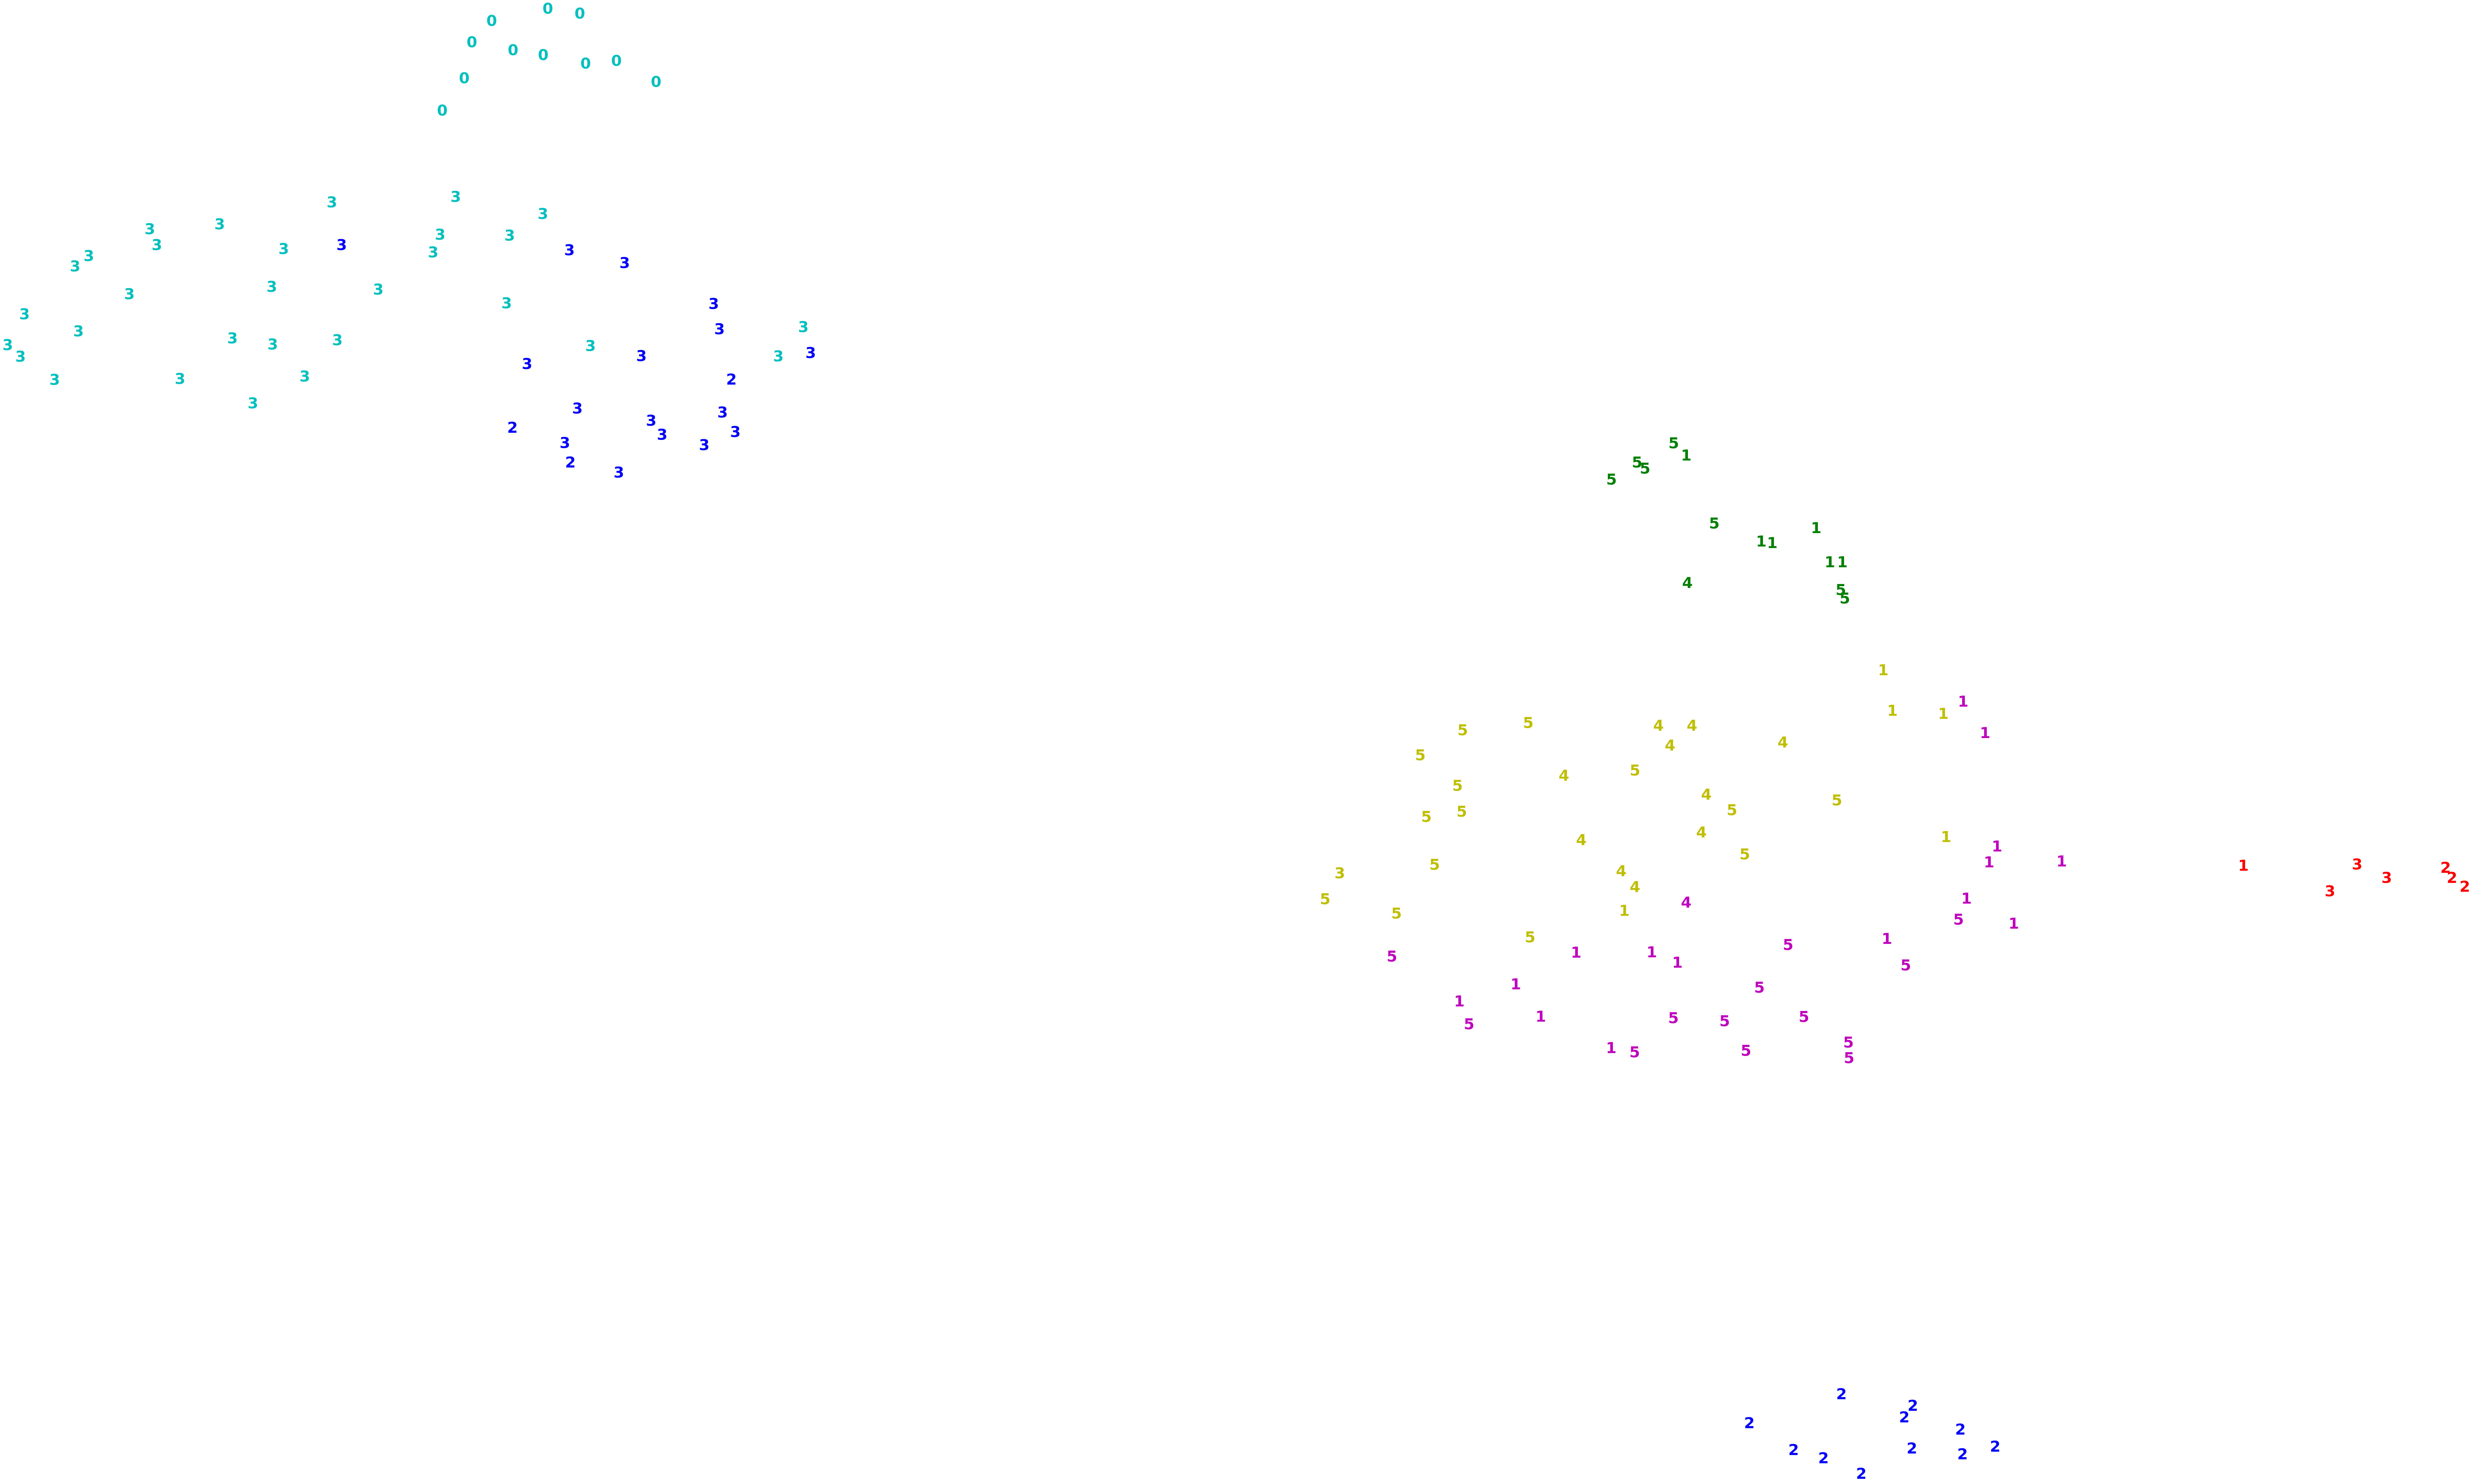

In [328]:
umap_results = umap.UMAP(n_neighbors=6,
                         min_dist=0.4,
                         metric='correlation').fit_transform(X_20_sca_df)

# Colors denote true classes
plt.figure(figsize=(10, 5))
colors = 'rbgcmy'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As expected based on previous attempts, UMAP results in the best 2D visualization based on spatial separation of clusters.

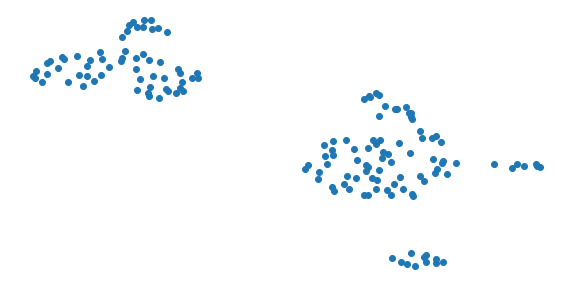

In [329]:
plt.figure(figsize=(10, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

With UMAP, I can see 6 distinct clusters.

## Summary
Unfortunately, none of the unsupervised models were able to correctly cluster the 6 classes (or really get anywhere close). I think this probably stems from two main issues. One, the data set is pretty small (only 150 samples), which really limits the amount of similarity data present for each cluster. Two, the gene expression changes for the six clusters may not be all that different, making it difficult to separate them out. Of the model-visualization combinations I did try, k-means with umap was the best based on ARI and silhouette scores, as well as the 2D spatial separation seen in the plot.